In [ ]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv ('EOD-DIS.csv')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,108.00,108.050,107.0600,107.77,3477599.0,0.0,1.0,105.021618,105.070239,104.107541,104.797960,3477599.0
1,2017-12-27,108.42,108.550,107.4550,107.64,5624037.0,0.0,1.0,105.430035,105.556450,104.491647,104.671545,5624037.0
2,2017-12-26,108.49,109.370,107.8900,108.12,3982398.0,0.0,1.0,105.498105,106.353836,104.914651,105.138308,3982398.0
3,2017-12-22,109.40,109.685,108.4500,108.67,7377990.0,0.0,1.0,106.383009,106.660149,105.459208,105.673141,7377990.0
4,2017-12-21,109.52,111.090,109.1892,109.57,9366706.0,0.0,1.0,106.499700,108.026403,106.178022,106.548321,9366706.0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,96.633832,97.284721,95.930802,96.634275,7.624408e+06,0.005954,1.0,90.882806,91.494367,90.222470,90.883165,7.624408e+06
std,13.296325,13.327518,13.221661,13.267403,4.352088e+06,0.070350,0.0,13.500515,13.537531,13.428000,13.475775,4.352088e+06
min,60.920000,61.220000,60.520000,60.930000,2.166034e+06,0.000000,1.0,55.396024,55.668821,55.032294,55.405117,2.166034e+06
25%,89.402500,90.032750,88.920000,89.617500,5.400734e+06,0.000000,1.0,82.357467,82.889778,81.883404,82.571496,5.400734e+06
50%,98.575000,99.175000,98.007500,98.595000,6.658320e+06,0.000000,1.0,93.751049,94.271816,93.018070,93.618734,6.658320e+06
75%,106.945000,107.526250,106.110000,106.940000,8.386674e+06,0.000000,1.0,101.417357,102.050565,100.590383,101.221291,8.386674e+06
max,121.500000,122.080000,120.610000,121.690000,6.090593e+07,1.150000,1.0,113.898573,114.442287,113.064255,114.076686,6.090593e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

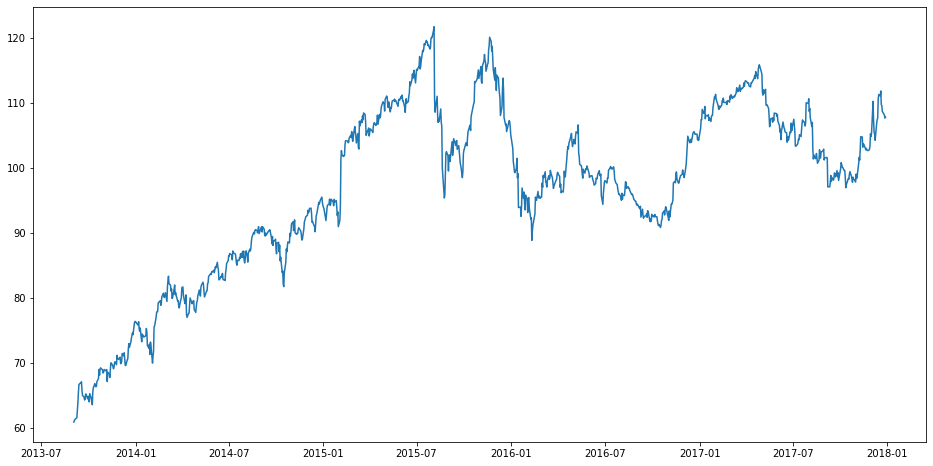

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#sorting
data = df.sort_index(ascending=True, axis=0)

In [ ]:
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])

In [ ]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]
    new_data['Open'][i] = data['Open'][i]

In [ ]:
new_data['Year'] = 0
new_data['Month'] = 0
new_data['Day'] = 0
new_data['is_year_start'] = 0
new_data['date_num'] = 0

for i in range(0, len(data)):
#     new_data.loc[:, ('Year', i)] = new_data['Date'][i].year
    new_data['Year'][i] = new_data['Date'][i].year
    new_data['Month'][i] = new_data['Date'][i].month
    new_data['Day'][i] = new_data['Date'][i].day
    if (new_data['Date'][i].month == 1 and new_data['Date'][i].day == 2):
        new_data['is_year_start'] = 1
    new_data['date_num'][i] = new_data['Date'][i].year + new_data['Date'][i].month * 10 + new_data['Date'][i].day

# new_data['volume_log'] =
    
    
# new_data['date_num'][500]
# new_data['is_year_start'][83]
# new_data = new_data['Date'].to_datetime()
# new_data['Date'] = new_data['Date'].astype(int)

In [ ]:
new_data.head()

,Date,Open,Year,Month,Day,is_year_start,date_num
0,2013-09-03 00:00:00,61.42,2013,9,3,1,2106
1,2013-09-04 00:00:00,60.92,2013,9,4,1,2107
2,2013-09-05 00:00:00,61.07,2013,9,5,1,2108
3,2013-09-06 00:00:00,61.47,2013,9,6,1,2109
4,2013-09-09 00:00:00,61.6,2013,9,9,1,2112


In [ ]:
from sklearn.model_selection import train_test_split

#split into train and validation
train = new_data[:871]
test = new_data[871:]

x_train = train.drop(['Open', 'Date'], axis=1)
y_train = train['Open']
x_test = test.drop(['Open', 'Date'], axis=1)
y_test = test['Open']


# X = new_data.drop('Close', axis=1)
# y = new_data['Close']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

10.804168637712637

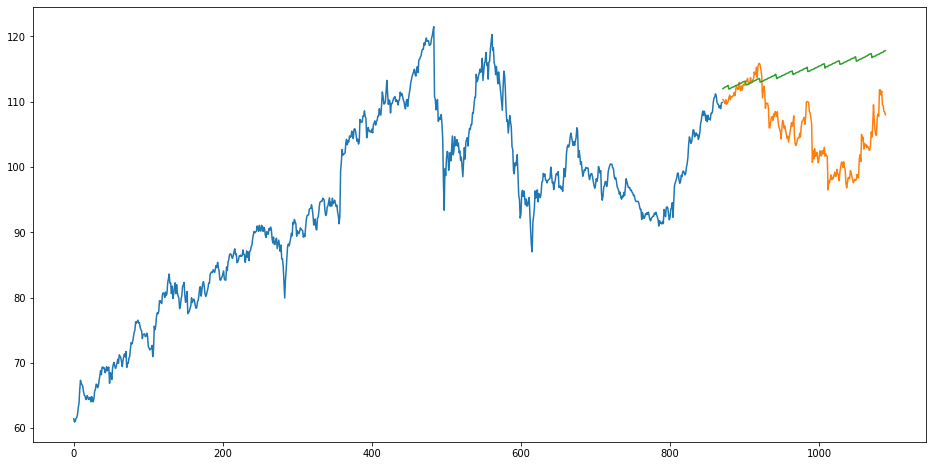

In [ ]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

test.index = new_data[871:].index
train.index = new_data[:871].index

plt.figure(figsize=(16,8))
plt.plot(train['Open'])
plt.plot(test[['Open', 'Predictions']])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_poly_test = poly_reg.fit_transform(x_test)
preds = pol_reg.predict(x_poly_test)

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

26.95787194826818

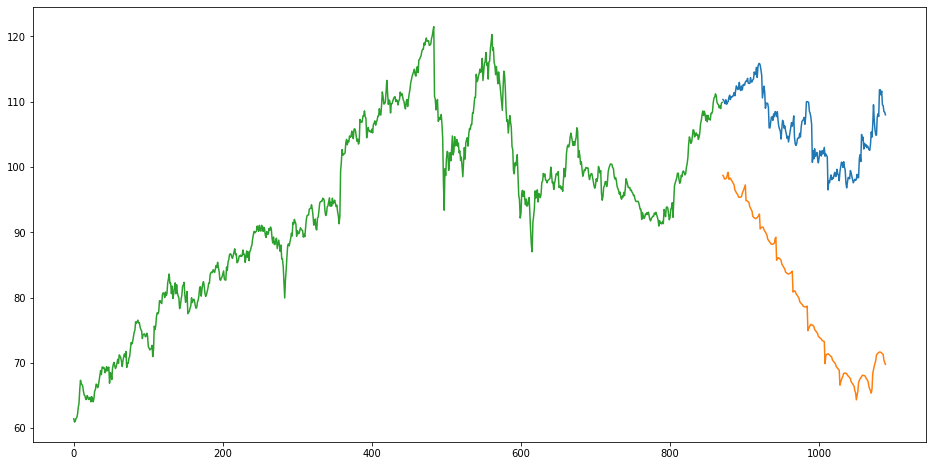

In [ ]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

plt.figure(figsize=(16,8))
plt.plot(test[['Open', 'Predictions']])
plt.plot(train['Open'])

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train, y_train)
preds = model.predict(x_test)

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

32.158797820510934

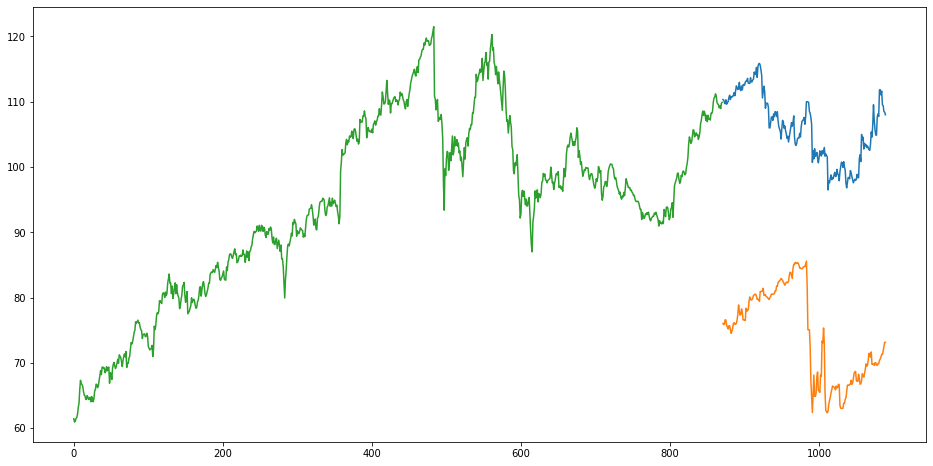

In [ ]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

plt.figure(figsize=(16,8))
plt.plot(test[['Open', 'Predictions']])
plt.plot(train['Open'])